<a href="https://colab.research.google.com/github/rohhj622/windPowerPrediction/blob/master/code1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn import model_selection
from keras import models, layers, Sequential
from keras.layers import LSTM, Dropout, Dense, Activation, Input

## 1) 구글 드라이브 연결

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

## 3) 데이터 불러오기 시작

In [ ]:
allData = pd.read_csv(r'/content/gdrive/My Drive/Colab Notebooks/preprocessing_Data.csv') # 컬럼명 숫자로 들어가게
allData = allData.drop('Unnamed: 0',1)
allData

# 2. 데이터 가공하기 

## 1) datetime 컬럼 제작, datetime 형식으로 변환

In [ ]:
df = allData.copy()
df['datetime'] = pd.to_datetime(df['datetime'],format='%Y-%m-%d %H:%M', errors='ignore') #합친거 datetime 형식으로 변환
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d', errors='ignore')  #date형식으로 변환
#df['time'] = pd.to_datetime(df['time'],format='%H:%M', errors='ignore') #time 형식으로 변환
df.head(5)

## 2) 년(year), 월(month), 일(day), 계절(season) 컬럼 생성



In [ ]:
df['year'] = df['date'].dt.year # 년
df['month'] = df['date'].dt.month # 월
df['day'] = df['date'].dt.day# 일

conditionlist = [
    (df['month'] == 3)|(df['month'] == 4)| (df['month'] == 5) ,
    (df['month'] == 6)|(df['month'] == 7)|(df['month'] == 8) ,
    (df['month'] == 9)|(df['month'] == 10)|(df['month'] == 11),
    (df['month'] == 12)|(df['month'] == 1)|(df['month'] == 2) ]
choicelist = ['0', '1', '2','3']
#choicelist = ['spring', 'summer', 'autumn','winter']
df['season'] = np.select(conditionlist, choicelist, default='Not Specified')
df.head(5)

# 4. 훈련 & 예측

## 1) train-test data 나누기

In [ ]:
df2 = df.copy()
df2.info()

In [ ]:
X = df2[['tem','windSpeed','windDirect','humidity','groundTem','seaLevelPressure']]
y = df2[['windForce']]

transform = MinMaxScaler()
trans_X=transform.fit_transform(X)
trans_y=transform.fit_transform(y)

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)
print('train data 개수 : ', len(X_train))
print('test data 개수: ', len(X_test))
print(len(X_train)+len(X_test))

## 5. test


In [33]:
# X = df2[['windSpeed']]
# y = df2[['windForce']]
# X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)
# print('train data 개수 : ', len(X_train))
# print('test data 개수: ', len(X_test))

# print(len(X_train)+len(X_test))

In [34]:
lr  = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [35]:
print("score : ", format(lr.score(X_train,y_train)))

score :  0.4710747457367676


In [36]:
y_predict = lr.predict(X_test)

In [37]:
print(format(lr.score(X_test,y_test)))

0.46081296029969876


In [38]:
tr = MinMaxScaler()

X = df2[['windSpeed','seaLevelPressure']]
y = df2[['windForce']]

X = tr.fit_transform(X)



In [39]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)
print('train data 개수 : ', len(X_train))
print('test data 개수: ', len(X_test))

print(len(X_train)+len(X_test))

train data 개수 :  36808
test data 개수:  15776
52584


In [40]:
network = models.Sequential()

In [41]:
network.add(layers.Dense(128,activation='relu'))
network.add(layers.Dense(64,activation='relu'))
network.add(layers.Dense(1))

In [42]:
network.compile(optimizer='rmsprop',loss='mean_squared_error')
network.fit(X_train, y_train, epochs=200, batch_size=128)

Epoch 1/200
288/288 [==============================] - 1s 2ms/step - loss: 20573909.2249
Epoch 2/200
288/288 [==============================] - 0s 1ms/step - loss: 18239769.8131
Epoch 3/200
288/288 [==============================] - 0s 1ms/step - loss: 12894711.3979
Epoch 4/200
288/288 [==============================] - 0s 1ms/step - loss: 10404258.5294
Epoch 5/200
288/288 [==============================] - 0s 2ms/step - loss: 9997591.6990
Epoch 6/200
288/288 [==============================] - 0s 2ms/step - loss: 10090129.6747
Epoch 7/200
288/288 [==============================] - 0s 2ms/step - loss: 9522553.7093
Epoch 8/200
288/288 [==============================] - 0s 2ms/step - loss: 9225759.9412
Epoch 9/200
288/288 [==============================] - 0s 1ms/step - loss: 8831931.6436
Epoch 10/200
288/288 [==============================] - 0s 1ms/step - loss: 8345143.5934
Epoch 11/200
288/288 [==============================] - 0s 1ms/step - loss: 7873609.3633
Epoch 12/200
288/288 [===

In [43]:
# def compare_graph(network,X_test, y_test):
#   y_pred = network.predict(X_test).flatten()
#   real = []
#   pred = []
#   index = []
#   for i in range(100):
#     index.append(i)
#     real.append(y_test[i])
#     pred.append(y_pred[i])
#   plt.figure(figsize =(10,5))
#   plt.plot(index,real,'b-',label='Real')
#   plt.plot(index,pred,'r--',label='Pred')
#   plt.legend(loc='center left', fontsize=12)
#   plt.show()

In [44]:
y_pred = network.predict(X_test).flatten()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


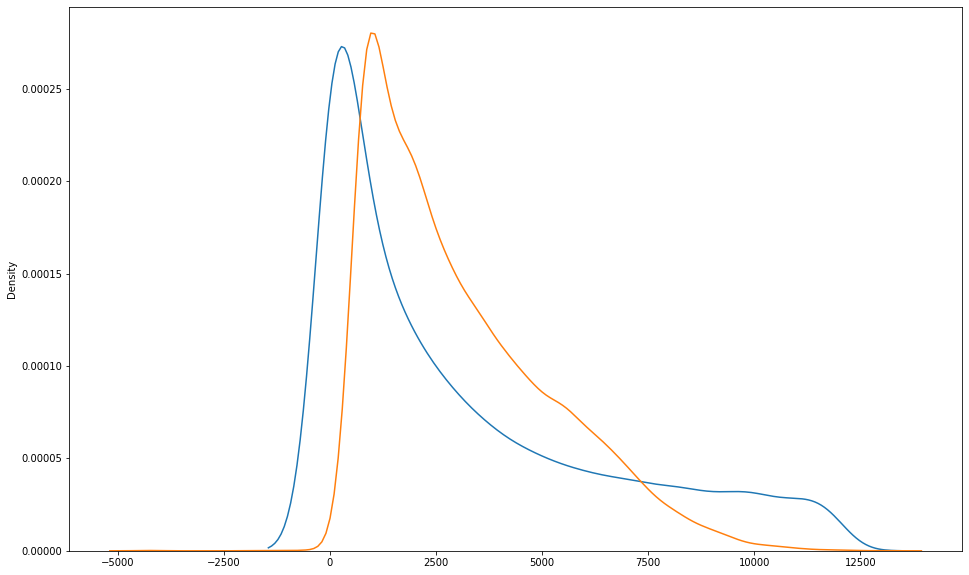

In [45]:
plt.figure(figsize=(16,10))
ax1 = sns.distplot(y_test,hist=False,label='y')
ax2 = sns.distplot(y_pred,hist=False,label='y_hat',ax=ax1)

plt.show()
plt.close()

In [46]:
df2.head()

,datetime,date,time,windForce,tem,windSpeed,windDirect,humidity,vaporPressure,dewPoint,pressure,seaLevelPressure,groundTem,year,month,day,season
0,2013-01-01 00:00:00,2013-01-01,00:00,0,1.3,3.2,340,77.0,5.2,-2.2,1019.1,1021.3,0.0,2013,1,1,3
1,2013-01-01 01:00:00,2013-01-01,01:00,0,0.9,2.6,320,77.0,5.0,-2.6,1019.0,1021.2,0.0,2013,1,1,3
2,2013-01-01 02:00:00,2013-01-01,02:00,92,1.5,3.0,340,77.0,5.2,-2.1,1019.0,1021.2,0.0,2013,1,1,3
3,2013-01-01 03:00:00,2013-01-01,03:00,269,2.7,1.7,270,74.0,5.5,-1.4,1019.0,1021.2,0.3,2013,1,1,3
4,2013-01-01 04:00:00,2013-01-01,04:00,541,0.6,1.8,320,82.0,5.2,-2.1,1018.5,1020.8,0.1,2013,1,1,3


In [47]:
# X = df2[['tem','windSpeed','humidity','groundTem','windDirect','seaLevelPressure']] #,'windDirect'
# X = df2[['tem','windSpeed','groundTem']] #,'windDirect'
transform = MinMaxScaler()

scale_cols=['tem','windSpeed','groundTem','windForce']
df_scaled = df2[['tem','windSpeed','groundTem','windForce']] 
df_scaled = transform.fit_transform(df_scaled)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

df_scaled

,tem,windSpeed,groundTem,windForce
0,0.190123,0.180791,0.061135,0.000000
1,0.180247,0.146893,0.061135,0.000000
2,0.195062,0.169492,0.061135,0.007663
3,0.224691,0.096045,0.065502,0.022407
4,0.172840,0.101695,0.062591,0.045065
...,...,...,...,...
52579,0.264198,0.265537,0.109170,0.724615
52580,0.254321,0.254237,0.103348,0.890796
52581,0.244444,0.225989,0.088792,0.457643
52582,0.251852,0.192090,0.091703,0.226406


In [48]:
WINDOW_SIZE = 100

trans_X = df_scaled[['tem','windSpeed','groundTem']]
trans_y = df_scaled[['windForce']]

X_train, X_test,y_train, y_test = train_test_split(trans_X,trans_y,test_size=0.2,random_state=10)

In [49]:
def make_dataset(data, label, window_size=1):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

train_feature, train_label = make_dataset(trans_X, trans_y, 1)
train_feature

array([[[0.19012346, 0.18079096, 0.06113537]],

       [[0.18024691, 0.14689266, 0.06113537]],

       [[0.19506173, 0.16949153, 0.06113537]],

       ...,

       [[0.25432099, 0.25423729, 0.10334789]],

       [[0.24444444, 0.2259887 , 0.08879185]],

       [[0.25185185, 0.1920904 , 0.09170306]]])

In [50]:
#X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)
# X_train, X_test,y_train, y_test = train_test_split(trans_X,trans_y,test_size=0.2,random_state=10)
X_train, X_test,y_train, y_test = train_test_split(train_feature,train_label,test_size=0.2,random_state=10)


print('train data 개수 : ', len(X_train))
print('test data 개수: ', len(X_test))
print(len(X_train)+len(X_test))

train data 개수 :  42066
test data 개수:  10517
52583


In [51]:
X_train.head()

AttributeError: ignored

In [ ]:
X_train = X_train.values
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values

In [ ]:
X_train_t = X_train.reshape(X_train.shape[0], 3, 1) 
X_test_t = X_test.reshape(X_test.shape[0], 3, 1)

In [ ]:
# from keras.layers import LSTM 
# from keras.models import Sequential 
# from keras.layers import Dense 
# import keras.backend as K 
# from keras.callbacks import EarlyStopping

# K.clear_session()
    
# model = Sequential() # Sequeatial Model 
# model.add(LSTM(20, input_shape=(3, 1), return_sequences=True)) # (timestep, feature) 
# model.add(Dense(1)) # output = 1 
# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc']) 
# model.summary()

In [ ]:
# early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

# model.fit(X_train_t, y_train, epochs=100,batch_size=30, verbose=1, callbacks=[early_stop])

In [ ]:
network = models.Sequential()
network.add(LSTM(20, input_shape=(3, 1), return_sequences=True))

# network.add(layers.Dense(2, input_dim=3, activation='relu'))
# network.add(layers.LSTM(2, input_shape=X_train.shape, return_sequences=False))
# network.add(layers.Dense(2))
# network.add(layers.Dense(1))

network.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['acc'])

network.summary()

In [ ]:
network.fit(X_train_t, y_train, epochs=43 , batch_size=32)


scores = network.evaluate(X_test, y_test, batch_size=32)
print("%s: %.2f%%" %(network.metrics_names[1], scores[1]*100))

In [ ]:
y_pred = network.predict(X_test).flatten()

plt.figure(figsize=(16,10))
ax1 = sns.distplot(y_test,hist=False,label='y')
ax2 = sns.distplot(y_pred,hist=False,label='y_hat',ax=ax1)

plt.show()
plt.close()